# University Student Dropout Prediction Project

### Introduction
In this project, we aim to develop a machine learning model to predict the likelihood of university students dropping out. The challenge of student dropouts is a critical issue in higher education, impacting both the students' future and the educational institutions' effectiveness. Through predictive modeling, we seek to understand the key factors influencing dropout rates and identify at-risk students early in their academic journey.

### Project Objectives:

1. **Data Collection:** Acquire comprehensive and relevant datasets from universities, encompassing various factors like student demographics, academic records, engagement levels, and more.
2. **Data Preprocessing:** Clean and preprocess the data to ensure accuracy and reliability for our predictive analysis.
3. **Exploratory Data Analysis (EDA):** Perform in-depth analysis to uncover trends and insights within the data, guiding our feature selection and modeling approach.
4.  **Development:** Construct a predictive model utilizing mehtods such as Random Forest, XGBoost, Gradient Boosting, and Feed-forward Neural Networks, leveraging their combined strengths.
5. **Model Evaluation and Tuning:** Utilize relevant performance metrics to evaluate and refine the model, aiming for enhanced predictive accuracy and robustness.
6. **Interpretation and Reporting:** Interpret the results to provide meaningful insights and recommendations, focusing on strategies to improve student retention rates at the university level.

## 1. Data Collection:

**Sources Include:**
University requested student drop out data

## 2. Data Preprocessing

In [60]:
# Importing essential libraries

import pandas as pd
import numpy as np

In [61]:
url = "https://raw.githubusercontent.com/kflemming30/Student-Drop-Out-Prediction/main/OIR_Student%20Data%20Request.csv"
student_df = pd.read_csv(url)
student_df.head()


,PIDM,Cohort,SEX,Degree,Major 1,1st Year GPA,Dorm,1st Year Retention,College,Total Earned Hours,SAT,Major 2,Advisor
0,1,202109F,M,BS,Mechanical Engineering,2.49,Campion Hall,1,SEC,36,NaN,NaN,1.0
1,2,202109F,M,BS,Biology,3.18,Commuter,1,CAS,47,NaN,NaN,2.0
2,3,202109F,M,BS,Chemistry,2.86,Regis Hall,1,CAS,46,NaN,NaN,3.0
3,4,202109F,M,BS,DSB Undeclared,3.84,Gonzaga Hall,1,DSB,45,1300.0,NaN,4.0
4,5,202109F,M,BS,Management,2.69,Commuter,1,DSB,42,NaN,NaN,5.0


In [62]:
student_df.shape

(2584, 13)

## 3. Exploratory Data Analysis (EDA)

In [63]:
student_df['1st Year Retention'].value_counts()

1    2335
0     249
Name: 1st Year Retention, dtype: int64

In [65]:
student_df.describe()

,PIDM,1st Year GPA,1st Year Retention,Total Earned Hours,SAT,Advisor
count,2584.000000,2576.000000,2584.000000,2584.000000,632.000000,2576.000000
mean,1292.500000,3.360839,0.903638,45.852167,1306.977848,56.611413
std,746.080871,0.549521,0.295144,10.109841,88.935666,47.163027
min,1.000000,0.000000,0.000000,0.000000,980.000000,0.000000
25%,646.750000,3.110000,1.000000,45.000000,1240.000000,11.000000
50%,1292.500000,3.490000,1.000000,46.000000,1310.000000,53.000000
75%,1938.250000,3.750000,1.000000,51.000000,1370.000000,88.000000
max,2584.000000,4.000000,1.000000,81.000000,1550.000000,166.000000


In [66]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PIDM                2584 non-null   int64  
 1   Cohort              2584 non-null   object 
 2   SEX                 2584 non-null   object 
 3   Degree              2584 non-null   object 
 4   Major 1             2584 non-null   object 
 5   1st Year GPA        2576 non-null   float64
 6   Dorm                2584 non-null   object 
 7   1st Year Retention  2584 non-null   int64  
 8   College             2584 non-null   object 
 9   Total Earned Hours  2584 non-null   int64  
 10  SAT                 632 non-null    float64
 11  Major 2             6 non-null      object 
 12  Advisor             2576 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 262.6+ KB


In [67]:
student_df.groupby('College')['1st Year Retention'].mean()

College
CAS     0.888528
DSB     0.904889
EGAN    0.931398
SEC     0.916667
Name: 1st Year Retention, dtype: float64

In [82]:
# Group by Dorm and calculate mean retention, mean total earned hours, and mean 1st year GPA, along with counts
retention_mean_count = student_df.groupby('Dorm')['1st Year Retention'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
earned_hours_mean = student_df.groupby('Dorm')['Total Earned Hours'].mean().sort_values(ascending=False)
gpa_mean = student_df.groupby('Dorm')['1st Year GPA'].mean().sort_values(ascending=False)

# Merge the three Series on Dorm
result = pd.concat([retention_mean_count, earned_hours_mean, gpa_mean], axis=1)

# Add clarity to column names
result.columns = ['Count of Students Retention', 'Mean 1st Year Retention', 'Mean Total Earned Hours', 'Mean 1st Year GPA']

result

,Count of Students Retention,Mean 1st Year Retention,Mean Total Earned Hours,Mean 1st Year GPA
Dorm,,,,
1036 North Benson Road,1,1.000000,36.000000,3.690000
Jogues Hall,620,0.920968,47.885484,3.443441
Commuter,83,0.915663,45.674699,3.237531
Gonzaga Hall,402,0.915423,45.101990,3.350896
Campion Hall,496,0.915323,47.274194,3.319452
Regis Hall,585,0.897436,44.627350,3.342607
Loyola Hall,395,0.858228,43.567089,3.343772
Claver Hall,2,0.500000,35.500000,3.510000


In [86]:
student_df.groupby(['College', 'Major 1'])['1st Year Retention'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

mean  count
College Major 1                                             
CAS     American Studies                     1.000000      2
        Modern Languages                     1.000000      1
        Religious Studies                    1.000000      1
        Economics                            1.000000      7
        Physics                              1.000000      5
SEC     Biomedical Engineering               0.941176     17
        Computer Science                     0.937500     48
        SOE Undeclared                       0.935484     31
EGAN    Nursing                              0.935028    354
CAS     Sports Media                         0.933333     15
        Chemistry                            0.931034     29
DSB     DSB Undeclared                       0.923554    484
CAS     Sociology and Anthropology           0.923077     13
        Biology                              0.921986    141
DSB     Business Analytics                   0.920000     25
        Finance                              0.916667    240
        Accounting                           0.912500     80
CAS     Communication                        0.904762     63
        Undeclared                           0.904255    282
SEC     Mechanical Engineering               0.893617     47
CAS     History                              0.888889     27
EGAN    Social Work                          0.888889      9
DSB     Management                           0.881579     76
EGAN    Public Health                        0.875000     16
CAS     Psychology                           0.869110    191
DSB     Marketing                            0.863354    161
CAS     Visual & Performing Arts             0.857143     28
DSB     Economics                            0.846154     26
SEC     Electrical and Computer Engineering  0.846154     13
CAS     Mathematics                          0.846154     13
        English                              0.840000     25
        Digital Journalism                   0.833333      6
        Politics                             0.825000     40
DSB     International Business               0.818182     22
        Information Systems & Ops Mgmt       0.818182     11
CAS     International Studies                0.769231     13
        Program on the Environment           0.727273     22

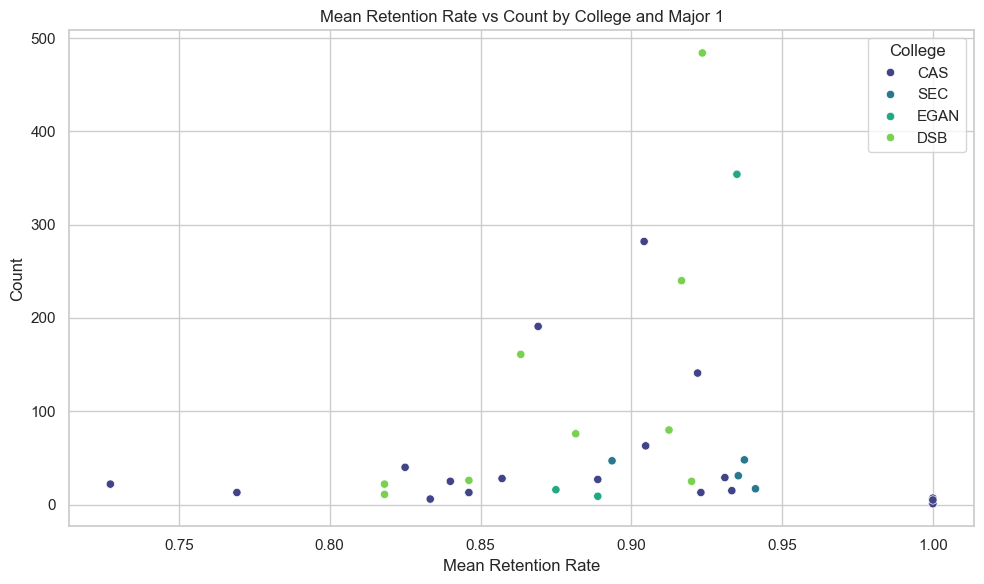

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by College and Major 1, calculate mean retention and count, then sort
grouped_data = student_df.groupby(['College', 'Major 1'])['1st Year Retention'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index()

# Plotting the scatter plot with switched axes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data, x='mean', y='count', hue='College', palette='viridis')

# Adding labels and title
plt.title('Mean Retention Rate vs Count by College and Major 1')
plt.xlabel('Mean Retention Rate')
plt.ylabel('Count')

# Show plot
plt.legend(title='College')
plt.grid(True)
plt.tight_layout()
plt.show()



## 4. Model Development

In [31]:

# Select categorical columns for one-hot encoding
categorical_cols = ['Cohort', 'SEX', 'Degree', 'Major 1', 'Dorm', 'College']

# Perform one-hot encoding
student_df_encoded = pd.get_dummies(student_df, columns=categorical_cols)

student_df_encoded.head()


,PIDM,1st Year GPA,1st Year Retention,Total Earned Hours,SAT,Major 2,Advisor,Cohort_202109F,Cohort_202209F,SEX_F,...,Dorm_Claver Hall,Dorm_Commuter,Dorm_Gonzaga Hall,Dorm_Jogues Hall,Dorm_Loyola Hall,Dorm_Regis Hall,College_CAS,College_DSB,College_EGAN,College_SEC
0,1,2.49,1,36,NaN,NaN,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,3.18,1,47,NaN,NaN,2.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,3,2.86,1,46,NaN,NaN,3.0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,4,3.84,1,45,1300.0,NaN,4.0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,5,2.69,1,42,NaN,NaN,5.0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [32]:
student_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 62 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PIDM                                         2584 non-null   int64  
 1   1st Year GPA                                 2576 non-null   float64
 2   1st Year Retention                           2584 non-null   int64  
 3   Total Earned Hours                           2584 non-null   int64  
 4   SAT                                          632 non-null    float64
 5   Major 2                                      6 non-null      object 
 6   Advisor                                      2576 non-null   float64
 7   Cohort_202109F                               2584 non-null   uint8  
 8   Cohort_202209F                               2584 non-null   uint8  
 9   SEX_F                                        2584 non-null   uint8  
 10  

In [33]:
student_df_encoded = student_df_encoded.dropna(axis=1)

In [34]:
student_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 58 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   PIDM                                         2584 non-null   int64
 1   1st Year Retention                           2584 non-null   int64
 2   Total Earned Hours                           2584 non-null   int64
 3   Cohort_202109F                               2584 non-null   uint8
 4   Cohort_202209F                               2584 non-null   uint8
 5   SEX_F                                        2584 non-null   uint8
 6   SEX_M                                        2584 non-null   uint8
 7   Degree_BA                                    2584 non-null   uint8
 8   Degree_BS                                    2584 non-null   uint8
 9   Degree_BSW                                   2584 non-null   uint8
 10  Major 1_Accounting      

In [36]:
student_df_encoded['1st Year Retention'].value_counts()

1    2335
0     249
Name: 1st Year Retention, dtype: int64

In [39]:
features = student_df_encoded.columns[(student_df_encoded.columns != 'PIDM') & (student_df_encoded.columns != '1st Year Retention')]
target = "1st Year Retention"

In [41]:
X = student_df_encoded[features]
y = student_df_encoded[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2067, 56), (2067,), (517, 56), (517,))

In [42]:
from sklearn import metrics

def train_test2(X_train, X_test, y_train, y_test, param_grid, clf):
    clf.fit(X_train, y_train)

    print("*** Parameter estimation results: ")
    print(clf.cv_results_)
    print()

    print("*** Grid scores: ")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    params = clf.cv_results_['params']

    for mean, std, param in zip(means, stds, params):
        print(f"{round(mean, 3)} (+/-{round(std*2, 3)}) for {param}")
    print()

    print("*** Highest accuracy score: ")
    print(f"{round(clf.best_score_, 3)}")
    print()

    print("*** Best parameters set found: ")
    print(clf.best_params_)
    print()

    y_true, y_pred = y_test, clf.predict(X_test)

    print("*** Classification report for the best parameters set: ")
    print(metrics.classification_report(y_true, y_pred))
    print()

    print("*** Confusion matrix for the best parameters set: ")
    print(metrics.confusion_matrix(y_true, y_pred))
    print()

    print("*** Final accuracy score: ")
    test_score = round(clf.score(X_test, y_test), 3)
    print(test_score)

    return clf, test_score

In [43]:
cv = 5
summary = dict()

### KNN

In [45]:
param_grid = [{"n_neighbors": [1, 3, 10, 30, 100]}]

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knc = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)
knc

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 10, 30, 100]}])

In [47]:
knc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, knc)

*** Parameter estimation results: 
{'mean_fit_time': array([0.00243521, 0.00223074, 0.0020205 , 0.00160122, 0.00220819]), 'std_fit_time': array([7.87534685e-04, 3.45970599e-04, 1.99814684e-05, 4.92567730e-04,
       4.16068890e-04]), 'mean_score_time': array([0.03127427, 0.01286249, 0.01755128, 0.01739321, 0.01890998]), 'std_score_time': array([0.03773044, 0.00069117, 0.00020119, 0.00036096, 0.00026017]), 'param_n_neighbors': masked_array(data=[1, 3, 10, 30, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 10}, {'n_neighbors': 30}, {'n_neighbors': 100}], 'split0_test_score': array([0.96135266, 0.98309179, 0.98067633, 0.98550725, 0.98550725]), 'split1_test_score': array([0.96376812, 0.97342995, 0.97826087, 0.97826087, 0.97826087]), 'split2_test_score': array([0.97578692, 0.98547215, 0.98789346, 0.98547215, 0.98547215]), 'split3_test_score': array([0.95883777, 

In [48]:
summary["k-NNs"] = score
summary

{'k-NNs': 0.973}

### Logistic Regression

In [49]:
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10], "solver": ["lbfgs", "liblinear"]}]

from sklearn.linear_model import LogisticRegression

lr = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
lr, score = train_test2(X_train, X_test, y_train, y_test, param_grid, lr)
summary["Logistic Regression"] = score
summary

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

*** Parameter estimation results: 
{'mean_fit_time': array([0.0215632 , 0.00390429, 0.01907907, 0.00313249, 0.03486347,
       0.00342536, 0.04339461, 0.0044951 , 0.03844342, 0.00390282,
       0.03828588, 0.00427518, 0.04030013, 0.00479379]), 'std_fit_time': array([9.22369786e-03, 1.56588313e-03, 2.52038365e-03, 4.72469834e-05,
       2.04485439e-02, 4.67491962e-04, 7.58949490e-03, 4.69298940e-04,
       5.64246610e-03, 4.57270565e-04, 4.42928458e-03, 5.54292926e-04,
       3.00795538e-03, 3.86780152e-04]), 'mean_score_time': array([0.00105004, 0.00126553, 0.00123997, 0.00170135, 0.00180221,
       0.0015029 , 0.00200558, 0.00183668, 0.00175686, 0.00140724,
       0.00225692, 0.0012094 , 0.00175066, 0.00160408]), 'std_score_time': array([8.13531427e-05, 4.88019455e-04, 7.47397510e-04, 5.60226904e-04,
       3.96371042e-04, 4.34585802e-04, 5.13126413e-06, 3.50985532e-04,
       4.60850555e-04, 4.52566185e-04, 3.80552184e-04, 3.76175368e-04,
       6.08562634e-04, 4.92353081e-04]), 'par

{'k-NNs': 0.973, 'Logistic Regression': 0.973}

### Decision Tree

In [50]:
param_grid = [{"max_depth": [1, 3, 10, None]}]

from sklearn.tree import DecisionTreeClassifier

dtc = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=cv)
dtc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, dtc)
summary["Decision Trees"] = score
summary

*** Parameter estimation results: 
{'mean_fit_time': array([0.0026176 , 0.0021596 , 0.00403996, 0.00420666]), 'std_fit_time': array([0.00078758, 0.00026445, 0.00061224, 0.00016043]), 'mean_score_time': array([0.00118637, 0.00084114, 0.00124307, 0.00124216]), 'std_score_time': array([0.00040843, 0.00031782, 0.00040774, 0.00043249]), 'param_max_depth': masked_array(data=[1, 3, 10, None],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 1}, {'max_depth': 3}, {'max_depth': 10}, {'max_depth': None}], 'split0_test_score': array([0.98309179, 0.98067633, 0.96859903, 0.96376812]), 'split1_test_score': array([0.97826087, 0.96618357, 0.96135266, 0.96135266]), 'split2_test_score': array([0.98547215, 0.98062954, 0.97578692, 0.96368039]), 'split3_test_score': array([0.96610169, 0.96610169, 0.95641646, 0.95399516]), 'split4_test_score': array([0.97578692, 0.968523  , 0.94430993, 0.94915254]), 'mean_test_score': array([0.9777426

{'k-NNs': 0.973, 'Logistic Regression': 0.973, 'Decision Trees': 0.973}

### Random Forest

In [51]:
param_grid = [{"n_estimators": [1, 3, 10, 30, 100, 300, 1000], "max_depth": [1, 3, 10, None]}]

from sklearn.ensemble import RandomForestClassifier

rfc = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=cv)
rfc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, rfc)
summary["Random Forest"] = score
summary

*** Parameter estimation results: 
{'mean_fit_time': array([0.00243082, 0.00404325, 0.01063366, 0.02723708, 0.08142266,
       0.24292064, 0.89854703, 0.00383501, 0.00630159, 0.01318731,
       0.035848  , 0.10382023, 0.26925354, 0.83909163, 0.00324631,
       0.0052053 , 0.01457281, 0.03887706, 0.12820635, 0.38322115,
       1.412216  , 0.00422063, 0.00789852, 0.0179563 , 0.05732584,
       0.15936494, 0.44913168, 1.45396571]), 'std_fit_time': array([0.0004871 , 0.00038824, 0.00104991, 0.00193204, 0.00311806,
       0.0111895 , 0.04850224, 0.00042067, 0.00076142, 0.00072632,
       0.00601859, 0.0047691 , 0.02361128, 0.03612725, 0.00071353,
       0.00012275, 0.00099274, 0.00266393, 0.01058599, 0.01520361,
       0.12264897, 0.0009483 , 0.00105364, 0.00102578, 0.00491704,
       0.01025284, 0.01686361, 0.05550145]), 'mean_score_time': array([0.0014513 , 0.00131979, 0.00171824, 0.00249515, 0.0050158 ,
       0.0133388 , 0.04624476, 0.00188265, 0.00202985, 0.00242939,
       0.00332813,

{'k-NNs': 0.973,
 'Logistic Regression': 0.973,
 'Decision Trees': 0.973,
 'Random Forest': 0.971}

### XGBoost

In [53]:
pip install xgboost

     --------------------------------------- 99.8/99.8 MB 14.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [54]:
param_grid = [{"reg_alpha": [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]

from xgboost import XGBClassifier

xgbc = GridSearchCV(XGBClassifier(random_state=0), param_grid, cv=cv)
xgbc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, xgbc)
summary["XGBoost"] = score
summary

*** Parameter estimation results: 
{'mean_fit_time': array([0.09974146, 0.10755525, 0.09180932, 0.09690866, 0.10032735,
       0.09130292, 0.07766566, 0.06495523, 0.06257343]), 'std_fit_time': array([0.01252798, 0.01582916, 0.00227681, 0.01334238, 0.01154239,
       0.00320648, 0.00792783, 0.0014251 , 0.00102909]), 'mean_score_time': array([0.01296697, 0.01222668, 0.01271505, 0.01221008, 0.01279783,
       0.01216421, 0.01244779, 0.01174259, 0.01165152]), 'std_score_time': array([7.26246076e-04, 1.16447385e-03, 4.22682546e-04, 1.24689098e-03,
       4.16690474e-04, 5.12546936e-05, 4.44880288e-04, 1.15341167e-03,
       1.57848589e-03]), 'param_reg_alpha': masked_array(data=[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'reg_alpha': 0.001}, {'reg_alpha': 0.003}, {'reg_alpha': 0.01}, {'reg_alpha': 0.03}, {'reg_alpha': 0.1}, {

{'k-NNs': 0.973,
 'Logistic Regression': 0.973,
 'Decision Trees': 0.973,
 'Random Forest': 0.971,
 'XGBoost': 0.973}

### Linear SVMs

In [55]:
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]

from sklearn.svm import LinearSVC

lsvc = GridSearchCV(LinearSVC(random_state=0), param_grid, cv=cv)
lsvc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, lsvc)
summary["Linear SVMs"] = score
summary

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto

*** Parameter estimation results: 
{'mean_fit_time': array([0.01427002, 0.01955972, 0.01724691, 0.02276049, 0.02452269,
       0.0246511 , 0.02480698]), 'std_fit_time': array([0.00664075, 0.00437733, 0.0014037 , 0.00576183, 0.00230959,
       0.00155877, 0.00205269]), 'mean_score_time': array([0.00173674, 0.00129595, 0.0016057 , 0.00156651, 0.00152817,
       0.00179057, 0.00174813]), 'std_score_time': array([0.00043011, 0.00043136, 0.00050365, 0.00042707, 0.00046257,
       0.0004882 , 0.0003647 ]), 'param_C': masked_array(data=[0.01, 0.03, 0.1, 0.3, 1, 3, 10],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.03}, {'C': 0.1}, {'C': 0.3}, {'C': 1}, {'C': 3}, {'C': 10}], 'split0_test_score': array([0.94927536, 0.96135266, 0.97342995, 0.97826087, 0.9589372 ,
       0.97584541, 0.97101449]), 'split1_test_score': array([0.94927536, 0.96618357, 0.97584541, 0.97584541, 0.97342995,
       0.9

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\12039\AppData\Roaming\jupyter

{'k-NNs': 0.973,
 'Logistic Regression': 0.973,
 'Decision Trees': 0.973,
 'Random Forest': 0.971,
 'XGBoost': 0.973,
 'Linear SVMs': 0.969}

### Kernelized SVMs

In [56]:
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10], "gamma": ["scale", "auto", 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]

from sklearn.svm import SVC

svc = GridSearchCV(SVC(random_state=0), param_grid, cv=cv)
svc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, svc)
summary["Kernelized SVMs"] = score
summary

*** Parameter estimation results: 
{'mean_fit_time': array([0.01743441, 0.01848555, 0.01735725, 0.02168794, 0.02325506,
       0.03765216, 0.06712594, 0.07670684, 0.08873959, 0.02312164,
       0.02181597, 0.01958241, 0.02189617, 0.03168807, 0.05600424,
       0.07693968, 0.09323025, 0.09946046, 0.02374101, 0.02820382,
       0.01891904, 0.02474079, 0.04011712, 0.06678138, 0.08585529,
       0.08950229, 0.10329452, 0.01478748, 0.0151711 , 0.01209607,
       0.01776061, 0.03058472, 0.05708709, 0.07530527, 0.0859818 ,
       0.10610332, 0.01025319, 0.01348009, 0.01061773, 0.01630993,
       0.02768607, 0.06402831, 0.0760066 , 0.08844728, 0.10542536,
       0.00862675, 0.01407671, 0.01012387, 0.01579471, 0.02463427,
       0.05506945, 0.07391648, 0.08505993, 0.10523367, 0.00860057,
       0.01476412, 0.01396852, 0.01680245, 0.02275476, 0.05316606,
       0.08260403, 0.08603396, 0.11348057]), 'std_fit_time': array([0.00306212, 0.00069709, 0.00085565, 0.00397294, 0.0009808 ,
       0.001492

{'k-NNs': 0.973,
 'Logistic Regression': 0.973,
 'Decision Trees': 0.973,
 'Random Forest': 0.971,
 'XGBoost': 0.973,
 'Linear SVMs': 0.969,
 'Kernelized SVMs': 0.973}

### Neural Networks

In [57]:
param_grid = [{"hidden_layer_sizes": [(10,), (30,), (100,)], "solver": ["lbfgs", "sgd", "adam"]}]

from sklearn.neural_network import MLPClassifier

mlpc = GridSearchCV(MLPClassifier(random_state=0), param_grid, cv=cv)
mlpc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, mlpc)
summary["Neural Networks"] = score
summary

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network

*** Parameter estimation results: 
{'mean_fit_time': array([0.18129659, 0.50103211, 0.57148833, 0.26352835, 0.58625808,
       0.54303122, 0.85335183, 1.09590454, 0.94281211]), 'std_fit_time': array([0.01596171, 0.01342196, 0.08961589, 0.00711293, 0.02772268,
       0.05128306, 0.03081536, 0.17652465, 0.07955283]), 'mean_score_time': array([0.00169311, 0.00220051, 0.00204635, 0.0020021 , 0.00194721,
       0.00186572, 0.00161142, 0.00224957, 0.00207753]), 'std_score_time': array([5.44896753e-04, 3.99404013e-04, 4.91035783e-05, 6.86811056e-06,
       2.14353413e-04, 2.55535365e-04, 4.80233268e-04, 3.98739677e-04,
       3.40701401e-05]), 'param_hidden_layer_sizes': masked_array(data=[(10,), (10,), (10,), (30,), (30,), (30,), (100,),
                   (100,), (100,)],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['lbfgs', 'sgd', 'adam', 'lbfgs', 's

C:\Users\12039\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'k-NNs': 0.973,
 'Logistic Regression': 0.973,
 'Decision Trees': 0.973,
 'Random Forest': 0.971,
 'XGBoost': 0.973,
 'Linear SVMs': 0.969,
 'Kernelized SVMs': 0.973,
 'Neural Networks': 0.973}

## Compare and choose model

In [58]:
summary

{'k-NNs': 0.973,
 'Logistic Regression': 0.973,
 'Decision Trees': 0.973,
 'Random Forest': 0.971,
 'XGBoost': 0.973,
 'Linear SVMs': 0.969,
 'Kernelized SVMs': 0.973,
 'Neural Networks': 0.973}